In [1]:
import pandas as pd
import plotly.express as px

In [2]:
path = "Data/CO2_emission.csv"
CO2 = pd.read_csv(path)
CO2.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


Now, right off the bat, we can see that there could possibly be a lot of countries with `NaN` values. Out of pure speculation, Aruba probably does not have much, if any CO2 emission (being a tropical island), so it can be justified that we can replace these `NaN` values with zeros. Since its actual CO2 emissions are probably negligible.

We also see that the 2019 column appears twice, which is redundant so we will go ahead and remove the 2019.1 column.

In [3]:
CO2 = CO2.fillna(0)
CO2 = CO2.drop(columns = "2019.1")

In [4]:
CO2.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.243614,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.976184,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.527624,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,6.157198,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217


Now that the data is cleaned, we will go ahead and export this new csv with 0s in place of the `NaN` values and the dropped repeated column.

In [5]:
file = 'CO2_emission_clean.csv'
path = 'Data/{}'.format(file)
CO2.to_csv(path, index=False)

In [6]:
df = CO2.T
df = df.reset_index()
df2 = df.set_axis(df.iloc[0], axis=1, inplace=False)
data = df2.drop([0, 1, 2, 3])
data = data.reset_index()
data = data.drop(labels = 'index', axis = 1)
data = data.rename({"Country Name": "Year"}, axis = "columns")

In [7]:
data.to_csv(path, index=False)

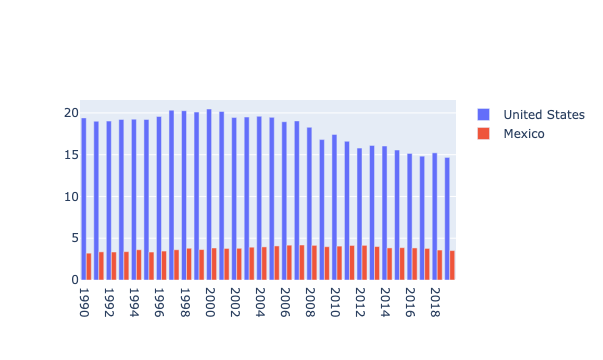

In [31]:
import plotly.graph_objects as go

go.Figure(data = [
    go.Bar(name = 'United States', x = data['Year'], y = data['United States'],),
    go.Bar(name='Mexico',x=data['Year'],y=data['Mexico'])
])